# kNN Classification


K-Nearest Neighbor (kNN) classification algorithm is a mature method in theory and one of the simplest machine learning algorithms. The idea of this method is：***If a sample has k most similar smaples(have a shortest distance in characteristic space) which are mostly belong to a category, then the sample also belongs to this category.*** Although KNN method also depends on limit theorem in principle, it is only related to a very small number of adjacent samples when making category decisions. Because the KNN method mainly depends on the limited neighboring samples, rather than the  method of judging the class domain, the KNN method is more suitable than other methods for the sample set which has more overlapping or overlapping class domains. 

KNN algorithm can be used not only for classification, but also for regression. KNN algorithm can be used not only for classification, but also for regression. The attributes of a sample can be obtained by finding out k nearest neighbors of the sample and assigning the average value of the attributes of these neighbors to the sample. A more useful method is to give different weights to the influence of neighbors with different distances on the sample, for example, the weights are proportional to the distance (combinatorial function).

The main disadvantage of this algorithm in classification is that when the samples are unbalanced, for example, the sample size of one class is very large, while the sample size of other classes is very small, which may lead to a large number samples contains most in the k neighbors of the sample when a new sample is input.In this case, the result of misjudgment may be produced. Therefore, we need to reduce the influence of quantity on operation results. 
another disadvantage of this method is that it is computationally intensive, because the distance between each text to be classified and all known samples must be calculated in order to obtain its K nearest neighbors. At present, the commonly used solution is to clip the known sample points in advance and remove the samples which have little effect on classification in advance. This algorithm is more suitable for automatic classification of class domains with large sample size, while those with small sample size are more prone to mismatching.

K-NN is the most direct method to classify unknown data. Basically, you can understand what K-NN does through the following picture and text description
![knn](images/knn.png)

In short，k-NN can be seen as：**While you have a set of data which have already being sorted, 
There is a pile of data that you already know the classification, and then when a new data enters, you start to find the distance from each point in the training data, and then pick the K points closest to this training data to see what these points belong to, and then classify the new data with the principle that the minority obeys the majority.**


## Algorithm steps：

* step.1---Import training sample
* step.2---Transfer the featuresof the sample into numbers
* step.3---Calculate the distance between unkonwn sample and training sample.
* step.4---Record the distace calculated in step 3 and save the category which training sample belong.
* step.5---Repeat step2,3, until we calculate all the distance.
* step.6---Sort the training data according to the distance with unkonwn sample and find the K nearest sample.
* step.7---Count the number of occurrences of each class label in the K-nearest neighbor sample
* step.8---Choose the label with the highest occurrence frequency as the class label of the unknown sample

## 生成数据

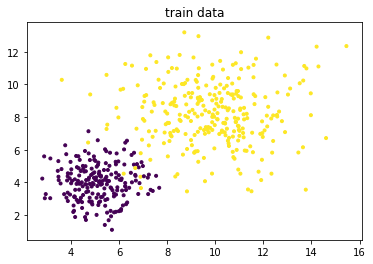

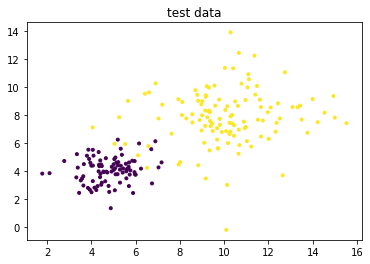

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# data generation
np.random.seed(314)
data_size_1 = 300
x1_1 = np.random.normal(loc=5.0, scale=1.0, size=data_size_1)
x2_1 = np.random.normal(loc=4.0, scale=1.0, size=data_size_1)
y_1 = [0 for _ in range(data_size_1)]

data_size_2 = 400
x1_2 = np.random.normal(loc=10.0, scale=2.0, size=data_size_2)
x2_2 = np.random.normal(loc=8.0, scale=2.0, size=data_size_2)
y_2 = [1 for _ in range(data_size_2)]

x1 = np.concatenate((x1_1, x1_2), axis=0)
x2 = np.concatenate((x2_1, x2_2), axis=0)
x = np.hstack((x1.reshape(-1,1), x2.reshape(-1,1)))
y = np.concatenate((y_1, y_2), axis=0)

data_size_all = data_size_1+data_size_2
shuffled_index = np.random.permutation(data_size_all)
x = x[shuffled_index]
y = y[shuffled_index]

split_index = int(data_size_all*0.7)
x_train = x[:split_index]
y_train = y[:split_index]
x_test = x[split_index:]
y_test = y[split_index:]

# visualize data
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='.')
plt.title("train data")
plt.show()
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, marker='.')
plt.title("test data")
plt.show()


## Program

In [2]:
import numpy as np
import operator

class KNN(object):

    def __init__(self, k=3):
        self.k = k

    def fit(self, x, y):
        self.x = x
        self.y = y

    def _square_distance(self, v1, v2):
        return np.sum(np.square(v1-v2))

    def _vote(self, ys):
        ys_unique = np.unique(ys)
        vote_dict = {}
        for y in ys:
            if y not in vote_dict.keys():
                vote_dict[y] = 1
            else:
                vote_dict[y] += 1
        sorted_vote_dict = sorted(vote_dict.items(), key=operator.itemgetter(1), reverse=True)
        return sorted_vote_dict[0][0]

    def predict(self, x):
        y_pred = []
        for i in range(len(x)):
            dist_arr = [self._square_distance(x[i], self.x[j]) for j in range(len(self.x))]
            sorted_index = np.argsort(dist_arr)
            top_k_index = sorted_index[:self.k]
            y_pred.append(self._vote(ys=self.y[top_k_index]))
        return np.array(y_pred)

    def score(self, y_true=None, y_pred=None):
        if y_true is None and y_pred is None:
            y_pred = self.predict(self.x)
            y_true = self.y
        score = 0.0
        for i in range(len(y_true)):
            if y_true[i] == y_pred[i]:
                score += 1
        score /= len(y_true)
        return score

In [3]:
# data preprocessing
x_train = (x_train - np.min(x_train, axis=0)) / (np.max(x_train, axis=0) - np.min(x_train, axis=0))
x_test = (x_test - np.min(x_test, axis=0)) / (np.max(x_test, axis=0) - np.min(x_test, axis=0))

# knn classifier
clf = KNN(k=3)
clf.fit(x_train, y_train)

print('train accuracy: {:.3}'.format(clf.score()))

y_test_pred = clf.predict(x_test)
print('test accuracy: {:.3}'.format(clf.score(y_test, y_test_pred)))

train accuracy: 0.986
test accuracy: 0.957


## sklearn program

In [7]:
% matplotlib inline

import matplotlib.pyplot as plt
from sklearn import datasets, neighbors, linear_model

# load data
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

print("Feature dimensions: ", X_digits.shape)
print("Label dimensions:   ", y_digits.shape)


Feature dimensions:  (1797, 64)
Label dimensions:    (1797,)


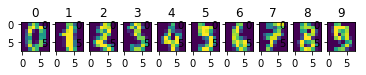

In [8]:
# plot sample images
nplot = 10
fig, axes = plt.subplots(nrows=1, ncols=nplot)

for i in range(nplot):
    img = X_digits[i].reshape(8, 8)
    axes[i].imshow(img)
    axes[i].set_title(y_digits[i])


In [9]:
# split train / test data
n_samples = len(X_digits)
n_train = int(0.4 * n_samples)

X_train = X_digits[:n_train]
y_train = y_digits[:n_train]
X_test = X_digits[n_train:]
y_test = y_digits[n_train:]


In [12]:
# do KNN classification
knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression()

print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f' % logistic.fit(X_train, y_train).score(X_test, y_test))

KNN score: 0.953661
LogisticRegression score: 0.908248


## References
* [Digits Classification Exercise](http://scikit-learn.org/stable/auto_examples/exercises/plot_digits_classification_exercise.html)
* [knn算法的原理与实现](https://zhuanlan.zhihu.com/p/36549000)